사이킷런의 주요 모듈 
==========

In [3]:
# 사이킷런 설치
!pip install scikit-learn

#!conda install scikit-learn

In [4]:
# 버전 확인
import sklearn
print(sklearn.__version__)

0.23.0


## 1. 회귀모델 실습

위의 데이터와 머신러닝의 회귀 모델을 이용해 데이터를 예측하는 모델을 만들어 보겠습니다.

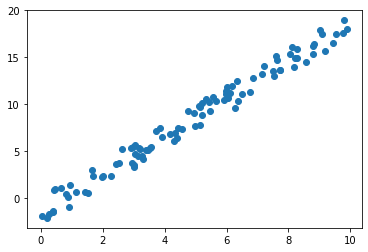

In [5]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [6]:
# 입력 데이터 x의 모양을 확인
x.shape

(100,)

In [7]:
# 정답 데이터 y의 모양을 확인
y.shape

(100,)

In [8]:
# 사이킷런에서 머신러닝 모델을 사용하기 위해서 우선 모델 객체를 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

- 사용할 모델의 이름은 LinearRegression 이며, 이것은 sklearn.linear_model 안에 있습니다.

In [10]:
# x를 행렬로 바꾸어 줌
X = x.reshape(100,1)

- 위의 입력 데이터인 x를 그대로 넣으면, 에러가 발생합니다.
- x는 numpy의 ndarray타입이니 reshape()를 사용하여 변수명 X에 특성 행렬을 넣어 줍니다.

In [11]:
model.fit(X,y)

LinearRegression()

- 이 모델을 훈련시킵니다. 훈련시키는 메소드는 fit()이라고 하는 메소드입니다.
- fit()메소드에 인자로 특성 행렬과 타겟 벡터를 넣어 줍니다. 즉, 행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어 줍니다.

In [12]:
# 새로운 데이터를 넣고 예측 해보기
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

- 새로운 데이터는 np.linspace()를 이용해서 생성합니다. 
- 예측은 predict()를 사용합니다. predict()의 인자 역시 행렬로 넣어 주어야 합니다.
  
  
 * 참고    
    reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 줍니다.

In [13]:
# 학습된 회귀 모델이 잘 예측했는지 모델의 성능을 평가해 보기
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y, y_new))
print(error)

9.299028215052264


- 모델의 성능 평가 관련 모듈은 sklearn.metrics에 저장되어 있습니다. 
- 회귀 모델의 경우 RMSE(Root Mean Square Error) 를 사용해 성능을 평가합니다.

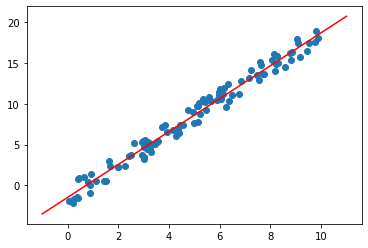

In [14]:
# 그래프로 확인
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

- 그래프의 점들과 회귀선이 거의 일치합니다. 

## 2. datasets 모듈

sklearn.datasets 모듈은 크게 dataset loaders와 dataset fetchers로 나뉘며, 각각 Toy dataset과 Real World dataset을 제공하고 있습니다.

    Toy dataset의 예시   
    - datasets.load_boston(): 회귀 문제, 미국 보스턴 집값 예측
    - datasets.load_breast_cancer(): 분류 문제, 유방암 판별
    - datasets.load_digits(): 분류 문제, 0 ~ 9 숫자 분류
    - datasets.load_iris(): 분류 문제, iris 품종 분류
    - datasets.load_wine(): 분류 문제, 와인 분류

* 데이터에 대한 설명은     
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
에 자세히 나와있습니다. 

### datasets.load_wine() 뜯어보기

In [15]:
# 와인 분류 데이터를 다운로드한 다음 data란 변수에 할당
from sklearn.datasets import load_wine

data = load_wine()
type(data)

sklearn.utils.Bunch

- sklearn.utils.Bunch라고 하는 데이터 타입입니다.      
  Bunch는 파이썬의 딕셔너리와 유사한 형태의 데이터 타입입니다.


In [16]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

- data를 출력해 보면 데이터들이 중괄호에 {} 담겨있고 콜론 : 을 이용해서 구분되어 있습니다.     
    바로 key와 value입니다. 번치 데이터 타입에도 파이썬의 딕셔너리 메소드인 keys()를 사용할 수 있습니다.

In [17]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

 각 키값이 의미하는 것이 무엇인지 하나씩 알아봅니다. 

### 1) data

키값 data는 특성 행렬입니다. 파이썬의 딕셔너리와 유사하기 때문에 키에 접근하기 위해서 .을 사용할 수 있습니다. 

In [18]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

- 특성 행렬은 2차원이며 행에는 데이터의 개수(n_samples)가 열에는 특성의 개수(n_features)가 들어 있습니다. 

In [19]:
# 키값 data 모양 확인
data.data.shape

(178, 13)

- 특성이 13개, 데이터가 178개인 특성 행렬이 나왔습니다. 

In [20]:
# 차원 확인
data.data.ndim

2

### 2) target

In [21]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- 키값 target은 타겟 벡터입니다.
- 타겟 벡터는 1차원입니다. 그리고 타겟 벡터의 길이는 특성 행렬의 데이터 개수와 일치해야 합니다. 

In [22]:
data.target.shape

(178,)

- 벡터의 길이가 특성 행렬의 데이터 수와 일치합니다.

### 3) feature_names

In [23]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

- feature_names란 키에 특성들의 이름이 저장되어 있습니다.

In [24]:
# feature의 개수 확인
len(data.feature_names)

13

- feature_names의 개수와 특성 행렬의 n_features(열)의 숫자가 일치합니다. 

### 4) target_names

In [25]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

- target_names는 분류하고자 하는 대상입니다.
- 데이터를 각각 class_0과 class_1, class_2로 분류한다는 뜻입니다.    
    와인의 종류가 상세하게 무엇을 의미하는지는 모르지만 각각 0번 와인, 1번 와인, 2번 와인으로 분류를 하는 문제입니다. 

### 5) DESCR

In [26]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- DESCR은 describe의 약자로 데이터에 대한 설명입니다. 

## 3. 사이킷런 데이터셋을 이용한 분류 문제 실습

### DataFrame으로 나타내기

특성행렬을 Pandas의 DataFrame으로 나타낼 수 있습니다.

In [27]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


- DataFrame으로 나타내니 한결 데이터 보기가 편해졌습니다. 이렇게 하면 EDA(Exploration Data Analysis)할 때 굉장히 편합니다.

### 머신러닝

이제 머신러닝 모델을 만들고 예측을 해보겠습니다.

In [28]:
# 특성 행렬은 통상 변수명 X에 저장하고, 타겟 벡터는 y에 저장
X = data.data
y = data.target

이번에는 분류 문제이므로 RandomForestClassifier를 사용해 보겠습니다.

In [29]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [30]:
# 훈련
model.fit(X, y)

RandomForestClassifier()

In [31]:
# 예측
y_pred = model.predict(X)

In [32]:
# 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣음 
print(classification_report(y, y_pred))
#정확도를 출력
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


- 성능은 sklearn.metrics 모듈을 사용합니다. 
- 분류 문제의 경우 classification_report 와 accuracy_score를 이용합니다.
    
    
- 정확도가 1 즉 100%가 나왔네요. 어떻게 된 걸까요? 이 부분은 이후 스텝에서 알아보겠습니다.

이번 스텝에서는 scikit-learn에서 데이터를 표현하는 방법과 그 활용법에 대해서 간단히 살펴보았습니다.

## 4. Estimator

이번에는 모델 훈련에서 핵심이 되는 API를 살펴보도록 하겠습니다.

### Estimator 객체

- 데이터셋을 기반으로 머신러닝 모델의 파라미터를 추정하는 객체를 Estimator라고 합니다.    
  사이킷런의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 구현되어 있습니다.    
  추정을 하는 과정 즉, 훈련은 Estimator의 fit()메소드를 통해 이루어지고, 예측은 predict()메소드를 통해 이루어집니다.


- 사이킷런의 Estimator 객체를 사용한다면 비지도학습, 지도학습에 관계 없이 학습과 예측을 할 수 있습니다.

## 훈련 데이터와 테스트 데이터 분리하기

훈련 데이터와 테스트 데이터 분리는 필수 기능입니다. 훈련에 쓴 데이터를 예측에 사용하면 항상 정확도는 100%가 나올 것이기 때문이죠.    
사이킷런에서는 이 필수 기능을 당연히 API로 제공하고 있습니다. 바로 model_selection의 train_test_split()함수 입니다.

In [33]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

- 보통 훈련 데이터와 테스트 데이터의 비율은 8:2로 설정합니다. 

- 인자로 특성 행렬 X와 타겟 벡터 y를 넣고 테스트 데이터의 비율을 20%로 넣어 키워드 인자로 지정해 줍니다.  
  사이킷런은 랜덤하게 데이터를 섞어주는 기능도 있습니다. random_state 인자에 seed 번호를 입력하면 됩니다. seed 번호는 임의로 결정할 수 있고, 같은 seed 번호를 사용하면 언제든 같은 결과를 얻을 수 있습니다.

In [34]:
print(type(result))
print(len(result))

<class 'list'>
4


- train_test_split()은 반환값으로 4개의 원소로 이루어진 list를 반환합니다. (*리스트 원소의 데이터 타입은 array입니다.)

In [35]:
# 모양을 확인
print(result[0].shape)
print(result[1].shape)
print(result[2].shape)
print(result[3].shape)

(142, 13)
(36, 13)
(142,)
(36,)


- 0번 원소부터 순서대로 훈련 데이터용 특성 행렬, 테스트 데이터용 특성 행렬, 훈련 데이터용 타겟 벡터, 테스트 데이터용 타겟 벡터입니다.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 우리는 이 함수를 이런 식으로 unpacking해서 씁니다.

### 실습

앞서 와인 분류 문제의 데이터를 훈련용 데이터셋과 테스트용 데이터셋으로 나눈 뒤 훈련하고 예측하는 전체 코드를 직접 작성해 봅니다. 

In [39]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드하기
data = load_wine()

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=11)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
print("정답률=", accuracy_score(y_test, y_pred))


정답률= 0.9722222222222222
